## **Problem Statement**
Indonesia, khususnya di Jakarta, sering menghadapi masalah kualitas udara yang buruk yang dapat berdampak negatif pada kesehatan masyarakat dan lingkungan. Untuk mengatasi masalah ini, diperlukan analisis mendalam terhadap data kualitas udara guna memahami pola, tren, dan faktor kritis yang mempengaruhi kualitas udara. Dataset indeks standar pencemar udara dari beberapa stasiun pemantauan di Jakarta memberikan informasi penting mengenai konsentrasi berbagai polutan seperti PM10, SO2, CO, O3, dan NO2. Tujuan dari analisis ini adalah untuk mengidentifikasi faktor utama yang mempengaruhi kualitas udara, memprediksi kategori kualitas udara di masa mendatang, dan memberikan rekomendasi untuk mengurangi pencemaran udara.

## **Business Understanding**
Kualitas udara yang buruk dapat menyebabkan berbagai masalah kesehatan seperti penyakit pernapasan, penyakit jantung, dan bahkan kematian dini. Selain itu, kualitas udara yang buruk juga dapat mempengaruhi produktivitas kerja, pariwisata, dan daya tarik investasi di Jakarta. Dengan demikian, pemerintah dan pemangku kepentingan lainnya perlu memahami kualitas udara dengan lebih baik dan mengambil tindakan yang efektif untuk memperbaikinya.

## **Objectives**
1. Monitoring and Reporting: Menyediakan laporan berkala tentang kualitas udara di berbagai lokasi di Jakarta untuk mendukung pengambilan keputusan yang berbasis data.

2. Health Advisory: Memberikan rekomendasi kesehatan kepada masyarakat berdasarkan kualitas udara yang terukur.

3. Policy Making: Mendukung pemerintah dalam merumuskan kebijakan dan regulasi untuk mengurangi pencemaran udara.

4. Predictive Analysis: Mengembangkan model prediktif untuk memproyeksikan kualitas udara di masa depan dan mengidentifikasi potensi kejadian kualitas udara buruk.

5. Public Awareness: Meningkatkan kesadaran masyarakat tentang pentingnya menjaga kualitas udara dan tindakan yang dapat diambil untuk mengurangi pencemaran.

## **Key Questions**
1. What are the current trends and patterns in air quality across different locations in Jakarta?

  Bagaimana tren dan pola kualitas udara di berbagai lokasi di Jakarta selama beberapa tahun terakhir?

2. Which pollutants are the most critical in determining air quality in Jakarta?
Polutan mana yang paling berpengaruh dalam menentukan kualitas udara di Jakarta?
How do various environmental factors and human activities correlate with changes in air quality?

  Bagaimana faktor lingkungan dan aktivitas manusia berhubungan dengan perubahan kualitas udara?

3. What are the potential health impacts associated with current levels of air pollution?

  Apa dampak kesehatan potensial yang terkait dengan tingkat pencemaran udara saat ini?

4. How can predictive models be used to forecast future air quality and identify periods of high risk?

  Bagaimana model prediktif dapat digunakan untuk memproyeksikan kualitas udara di masa depan dan mengidentifikasi periode risiko tinggi?

##**Success Criteria**
1. Accuracy of Predictions: Akurasi model prediktif dalam memproyeksikan kualitas udara di masa mendatang.
2. Reduction in Pollution Levels: Penurunan tingkat pencemaran udara sebagai hasil dari kebijakan dan tindakan yang diambil berdasarkan analisis data.
3. Public Health Improvement: Peningkatan kesehatan masyarakat yang diukur melalui pengurangan kasus penyakit yang terkait dengan polusi udara.
4. Stakeholder Engagement: Keterlibatan aktif dari pemangku kepentingan dalam implementasi rekomendasi dan tindakan yang diusulkan.
5. Increased Awareness: Peningkatan kesadaran masyarakat tentang pentingnya kualitas udara dan langkah-langkah yang dapat diambil untuk menjaga kebersihan udara.

### **Download,Import Dataset, Install Libraries**

In [ ]:
!kaggle datasets download -d ipunguhbpwt/jakartaairpolution -f indeks-standar-pencemar-udara-di-spku-dataset.csv

Dataset URL: https://www.kaggle.com/datasets/ipunguhbpwt/jakartaairpolution
License(s): unknown
indeks-standar-pencemar-udara-di-spku-dataset.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical

## **Data Understanding**

In [ ]:
df = pd.read_csv('indeks-standar-pencemar-udara-di-spku-dataset.csv')
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1830 non-null   object 
 1   stasiun   1830 non-null   object 
 2   pm10      1830 non-null   object 
 3   so2       1830 non-null   object 
 4   co        1830 non-null   object 
 5   o3        1830 non-null   object 
 6   no2       1830 non-null   object 
 7   max       1826 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1830 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.1+ KB


In [ ]:
df.describe()

,max
count,1826.000000
mean,56.793538
std,31.162334
min,0.000000
25%,40.000000
50%,60.000000
75%,76.000000
max,191.000000


In [ ]:
cat_col = []
con_col = []

for col in df.columns:
    if df[col].nunique() < 15:
        cat_col.append(col)
    else:
        con_col.append(col)

In [ ]:
def count_percentage_plot(df, x, target, suptitle):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    plt.suptitle(suptitle, fontsize=16)

    # Plot the count plot
    ax1.set_title(f"Number of {x.capitalize()} across Air Quality Categories")
    sns.countplot(data=df,x=target, hue=x, ax=ax1, palette="Set2")
    ax1.set_xlabel("")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Plot the percent plot
    ax2.set_title(f"Percentage of {x.capitalize()} across Air Quality Categories")
    sns.histplot(df, x=target, hue=x, stat="probability", multiple="fill", shrink=1,ax=ax2, palette='Set2')
    ax2.set_xlabel("")
    ax2.set_ylabel("Percentage")
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)


    # Annotating the plots
    for p1,p2 in zip(ax1.patches,ax2.patches):
        ax1.annotate("{:.1f}".format(p1.get_height()), (p1.get_x(),p1.get_height()))
        ax2.annotate("{:.2f}".format(p2.get_height()), (p2.get_x(),p2.get_height()))

    plt.tight_layout(pad=2)
    plt.show()

<ipython-input-124-abbcde7d39b4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-124-abbcde7d39b4>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)


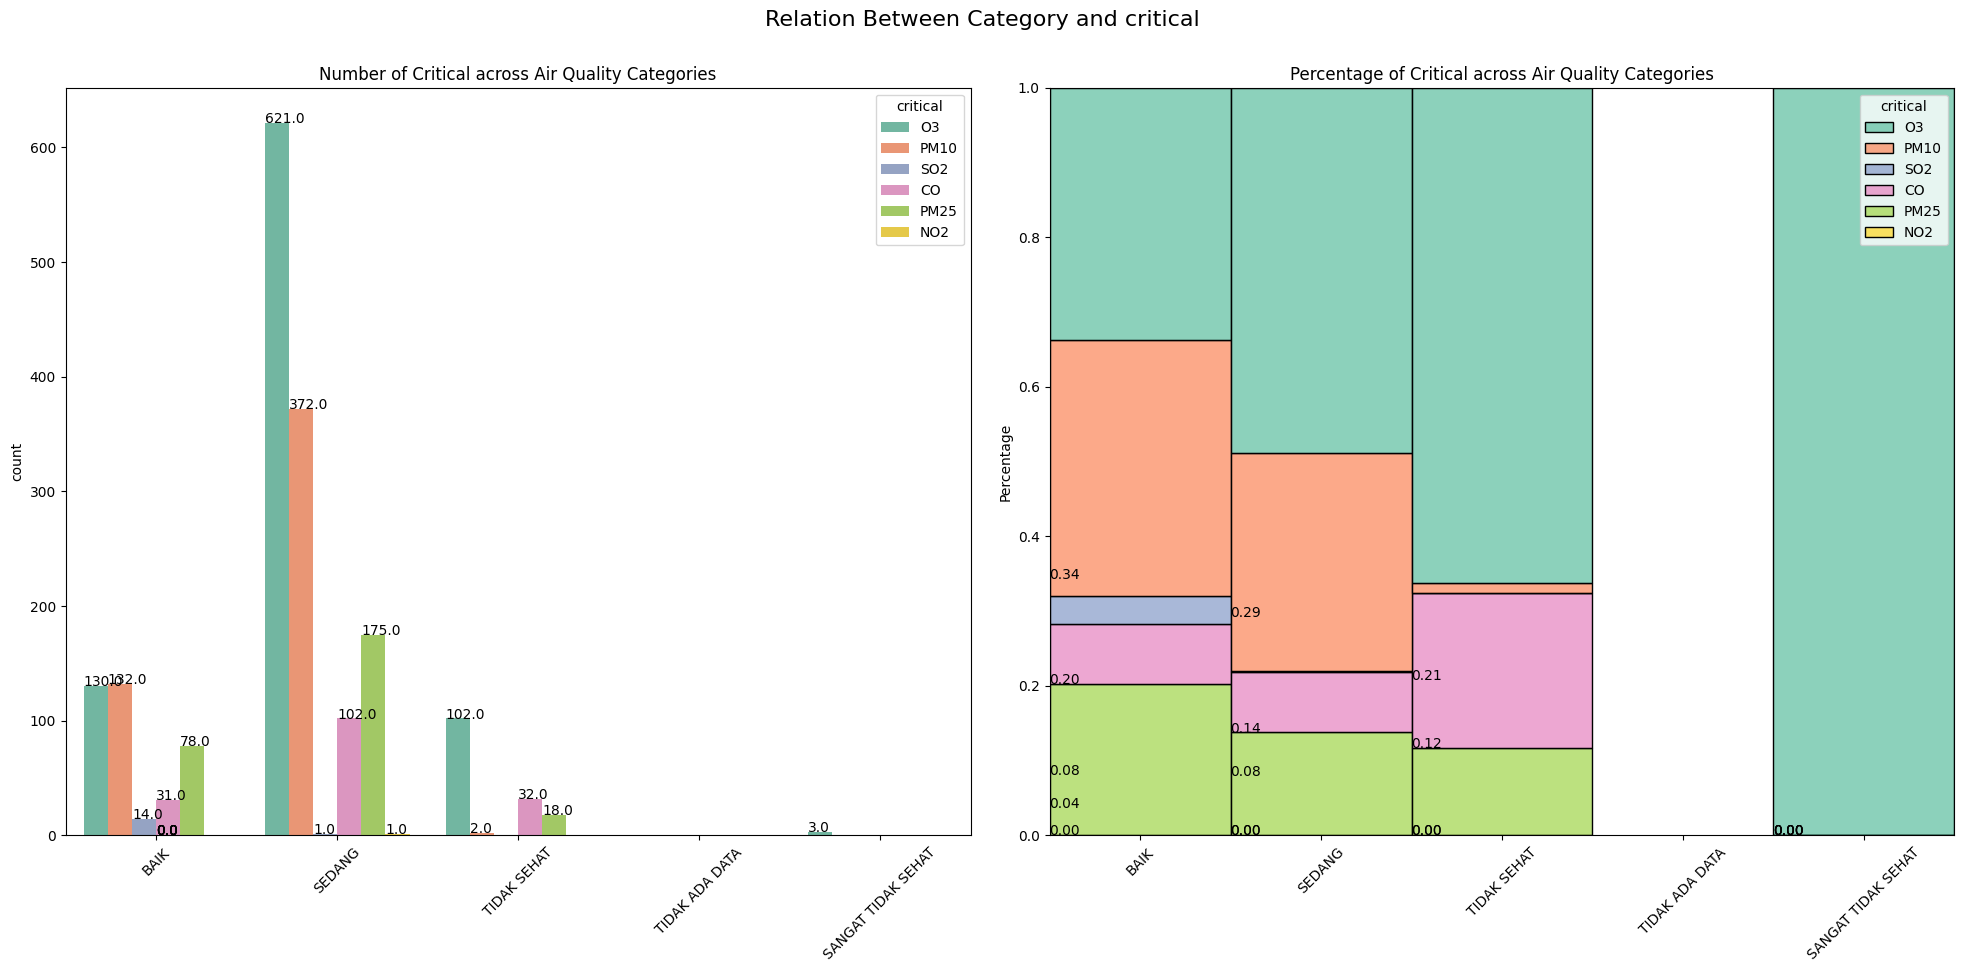

In [ ]:
count_percentage_plot(df, 'critical', 'categori', "Relation Between Category and critical")

## **Pre-Processing**

In [ ]:
df.groupby('categori').size()

categori
BAIK                   385
SANGAT TIDAK SEHAT       3
SEDANG                1272
TIDAK ADA DATA          16
TIDAK SEHAT            154
dtype: int64

In [ ]:
df.isnull().sum().to_numpy()

array([ 0,  0,  0,  0,  0,  0,  0,  4, 16,  0])

In [ ]:
#drop useless values
df.drop(["tanggal"],axis=1,inplace=True)
df.drop(["stasiun"],axis=1,inplace=True)
pd.set_option("display.max_columns", None)

df.dropna(axis=0)
df.dropna(axis=1)

,pm10,so2,co,o3,no2,categori
0,30,20,10,32,9,BAIK
1,27,22,12,29,8,BAIK
2,39,22,14,32,10,BAIK
3,34,22,14,38,10,BAIK
4,35,22,12,31,9,BAIK
...,...,...,...,...,...,...
1825,18,32,4,41,---,BAIK
1826,22,33,5,35,3,BAIK
1827,15,28,4,27,---,BAIK
1828,16,7,3,21,2,BAIK


In [ ]:
#drop any rows that have 7 in the rebounds column
df = df[df.pm10 != "---"]
df = df[df.so2 != "---"]
df = df[df.o3 != "---"]
df = df[df.co != "---"]
df = df[df.no2 != "---"]
df = df[df.critical != "---"]
df = df[df.categori != "---"]
df.dropna(subset = ["critical"], inplace=True)
df.dropna(subset = ["max"], inplace=True)
df= df[df['max'] != 0]

df

,pm10,so2,co,o3,no2,max,critical,categori
0,30,20,10,32,9,32.0,O3,BAIK
1,27,22,12,29,8,29.0,O3,BAIK
2,39,22,14,32,10,39.0,PM10,BAIK
3,34,22,14,38,10,38.0,O3,BAIK
4,35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...
1822,29,31,9,28,2,31.0,PM25,BAIK
1823,24,27,7,18,3,27.0,PM25,BAIK
1826,22,33,5,35,3,35.0,CO,BAIK
1828,16,7,3,21,2,21.0,CO,BAIK


In [ ]:
#check if there's Na value
df.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [ ]:
print(df.to_string())

     pm10  so2   co   o3  no2    max critical     categori
0      30   20   10   32    9   32.0       O3         BAIK
1      27   22   12   29    8   29.0       O3         BAIK
2      39   22   14   32   10   39.0     PM10         BAIK
3      34   22   14   38   10   38.0       O3         BAIK
4      35   22   12   31    9   35.0     PM10         BAIK
5      46   23   16   32    9   46.0     PM10         BAIK
6      37   23   26   33   11   37.0     PM10         BAIK
7      41   26   20   30   11   41.0     PM10         BAIK
8      52   23   29   24   12   52.0     PM10       SEDANG
9      24   24   18   25    8   25.0       O3         BAIK
10     34   31   25   23    8   34.0     PM10         BAIK
11     27   23    9   33    4   33.0       O3         BAIK
12     33   26   12   36    8   36.0       O3         BAIK
13     34   28   13   27    7   34.0     PM10         BAIK
14     29   22   13   36    8   36.0       O3         BAIK
15     52   60   19   30    8   60.0      SO2       SEDA

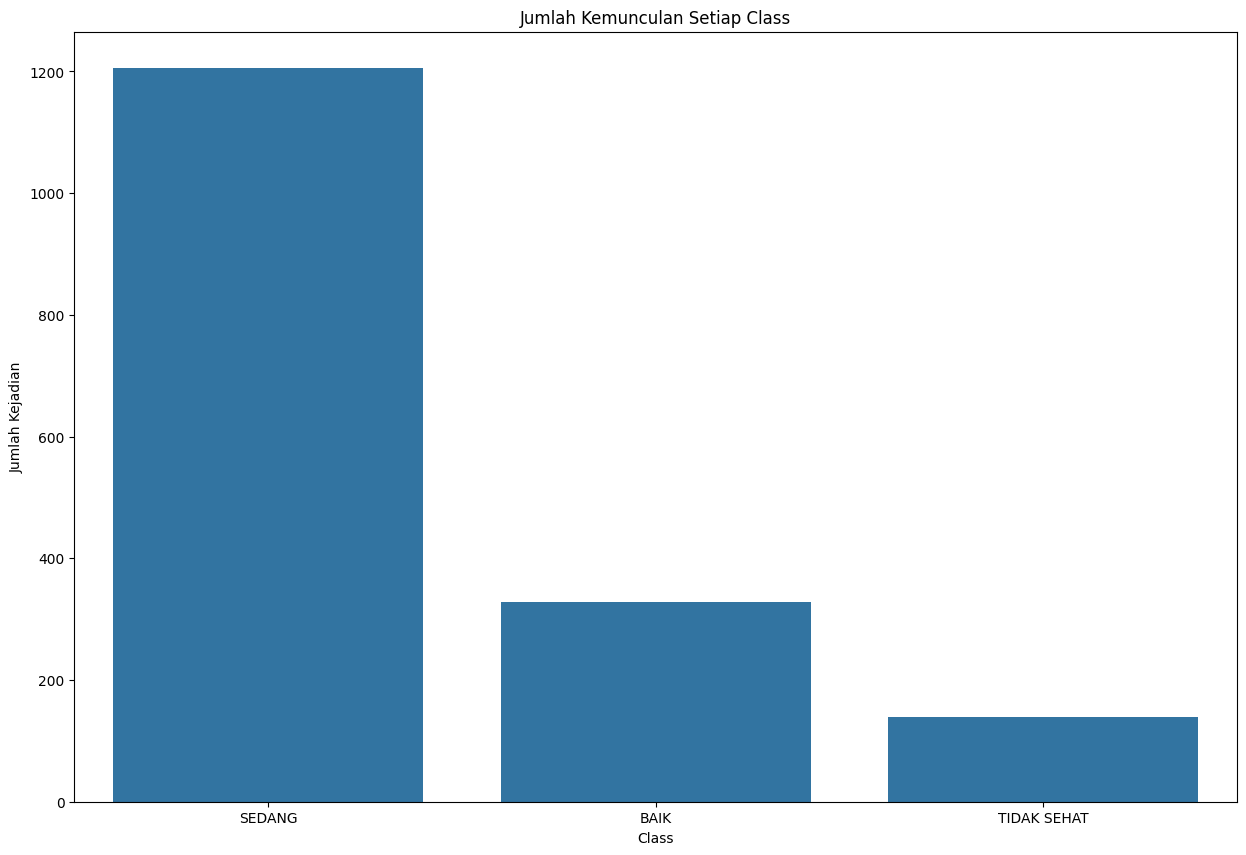

In [ ]:
#Hitung jumlah kemunculan setiap kelas di kolom 'categori'
class_counts = df['categori'].value_counts()

#barplot visualization
plt.figure(figsize=(15, 10))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Jumlah Kemunculan Setiap Class')
plt.xlabel('Class')
plt.ylabel('Jumlah Kejadian')
plt.show()

## **Splitting Data into Training and Testing**

In [ ]:
# karena pada target terdapat 4 class maka buat 4 data frame
data_1 = df[df['categori'] == 'BAIK']
data_2 = df[df['categori'] == 'SEDANG']
data_3 = df[df['categori'] == 'TIDAK SEHAT']

In [ ]:
# memakai fungsi sampling dari sklearn
from sklearn.utils import resample

# 100 sampel untuk tiap class
data_1_resample = resample(data_1, n_samples=100, random_state=0, replace=True)
data_2_resample = resample(data_2, n_samples=100, random_state=0, replace=True)
data_3_resample = resample(data_3, n_samples=100, random_state=0, replace=True)

In [ ]:
train_dataset = pd.concat([data_1, data_2_resample, data_3_resample])

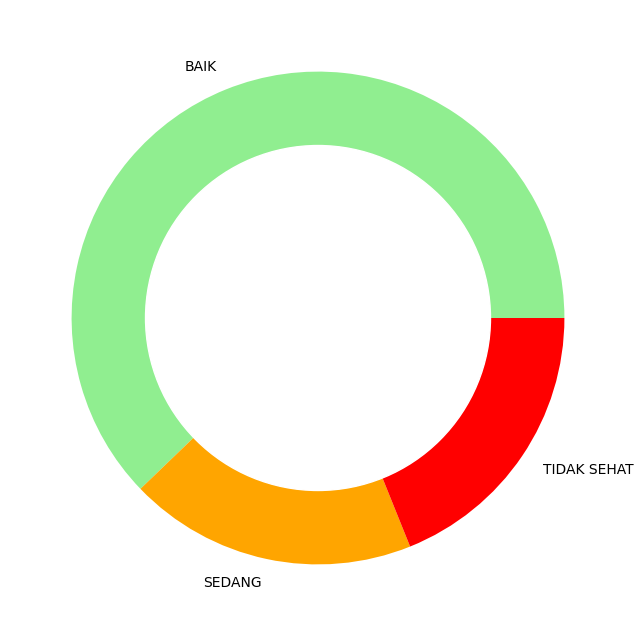

In [ ]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
labels = ['BAIK', 'SEDANG', 'TIDAK SEHAT']
colors = ['lightgreen', 'orange', 'red']
plt.pie(train_dataset.categori.value_counts(), labels=labels[:len(train_dataset.categori.value_counts())], colors=colors[:len(train_dataset.categori.value_counts())])

p = plt.gcf()
p.gca().add_artist(circle)

In [ ]:
df.dropna(subset = ["o3"], inplace=True)
df.dropna(subset = ["no2"], inplace=True)
df.dropna(subset = ["max"], inplace=True)
df.dropna(subset = ["critical"], inplace=True)
df.dropna(subset = ["categori"], inplace=True)

In [ ]:
#turn binary attributes into 0 and 1
df['categori']=df['categori'].map({'BAIK': 1, 'SEDANG': 2, 'TIDAK SEHAT': 3})
df['critical']=df['critical'].map({'O3': 1, 'PM10': 2, 'SO2': 3,'PM25':4,'CO':5})

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_att = ["critical"]
num_att = ["pm10","so2","co","o3","no2","max"]


# encode all the categorial features
transformer = ColumnTransformer([
    ("num_attrs", StandardScaler(), num_att),
    ("cat_attrs", OneHotEncoder(), cat_att)]
)

In [ ]:
df.isnull().values.any()

import numpy as np

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

df = df.dropna(axis=1)

print(df.to_string())

      index pm10  so2   co   o3  no2    max  critical  categori
0         0   30   20   10   32    9   32.0       1.0         1
1         1   27   22   12   29    8   29.0       1.0         1
2         2   39   22   14   32   10   39.0       2.0         1
3         3   34   22   14   38   10   38.0       1.0         1
4         4   35   22   12   31    9   35.0       2.0         1
5         5   46   23   16   32    9   46.0       2.0         1
6         6   37   23   26   33   11   37.0       2.0         1
7         7   41   26   20   30   11   41.0       2.0         1
8         8   52   23   29   24   12   52.0       2.0         2
9         9   24   24   18   25    8   25.0       1.0         1
10       10   34   31   25   23    8   34.0       2.0         1
11       11   27   23    9   33    4   33.0       1.0         1
12       12   33   26   12   36    8   36.0       1.0         1
13       13   34   28   13   27    7   34.0       2.0         1
14       14   29   22   13   36    8   3

In [ ]:
X = df.drop('categori', axis=1)
y = df.categori

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

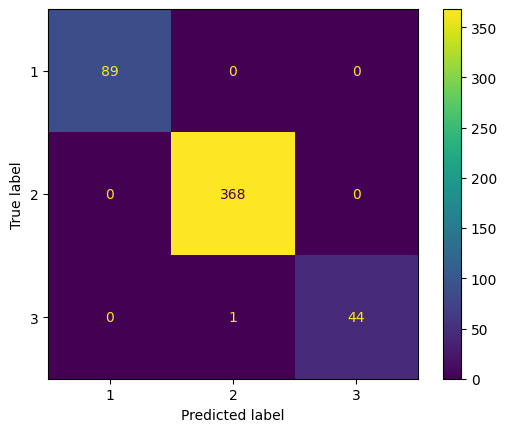

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# class_names = "Air Quality"
classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(classifier, X_train, y_train, X_test, y_test, train=True)
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               1      2     3  accuracy  macro avg  weighted avg
precision    1.0    1.0   1.0       1.0        1.0           1.0
recall       1.0    1.0   1.0       1.0        1.0           1.0
f1-score     1.0    1.0   1.0       1.0        1.0           1.0
support    240.0  836.0  94.0       1.0     1170.0        1170.0
_______________________________________________
Confusion Matrix: 
 [[240   0   0]
 [  0 836   0]
 [  0   0  94]]

Test Result:
Accuracy Score: 99.80%
_______________________________________________
CLASSIFICATION REPORT:
              1           2          3  accuracy   macro avg  weighted avg
precision   1.0    0.997290   1.000000  0.998008    0.999097      0.998013
recall      1.0    1.000000   0.977778  0.998008    0.992593      0.998008
f1-score    1.0    0.998643   0.988764  0.998008    0.995802      0.997998
support    89.0  368.000000  45.000000  0.99

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = load_iris()
X = df.data
Y = df.target

# Define models with pipelines including feature scaling where appropriate
models = []
models.append(('GNB', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

# Scoring metric
scoring = 'accuracy'

# Cross-validation settings
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Evaluate each model
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})')

# Optionally, you can visualize the results using a box plot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train your classifier, let's say 'classifier' is your trained model
# You should replace 'classifier' with the actual trained model
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")

    elif not train:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

print_score(classifier, X_train, Y_train, X_test, Y_test, train=True)
print_score(classifier, X_train, Y_train, X_test, Y_test, train=False)


In [ ]:
from sklearn.metrics import classification_report

def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

print_score(classifier, X_train, Y_train, X_test, Y_test, train=True)
print_score(classifier, X_train, Y_train, X_test, Y_test, train=False)

In [ ]:
# fitting
NB = GaussianNB()
NB.fit(X_train, Y_train)

In [ ]:
Y_pred = NB.predict(X_test)
Y_pred